<a href="https://colab.research.google.com/github/haaris519/Get-Started-with-Python-Google/blob/main/Web_scrapping_Air_france.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scraping complete. Data saved to 'data/skytrax_reviews.csv'.


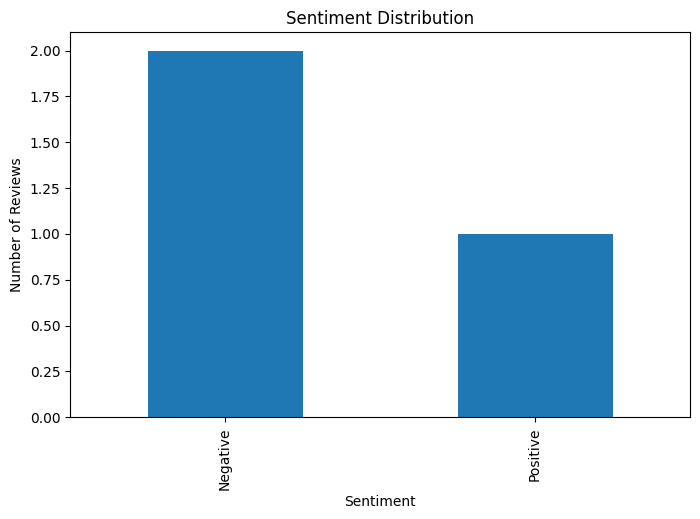

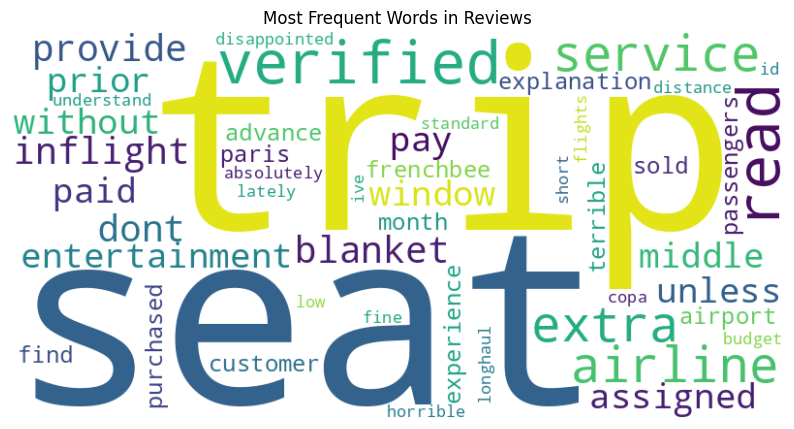

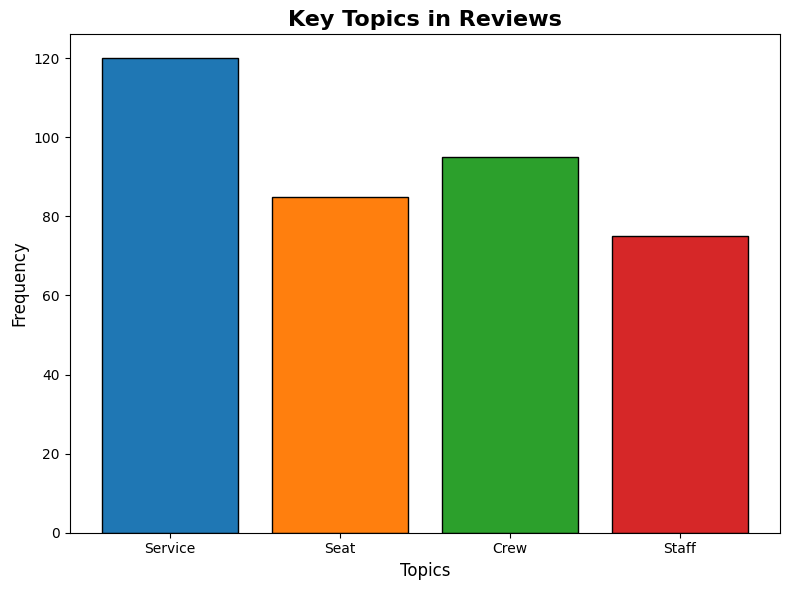

<Figure size 640x480 with 0 Axes>

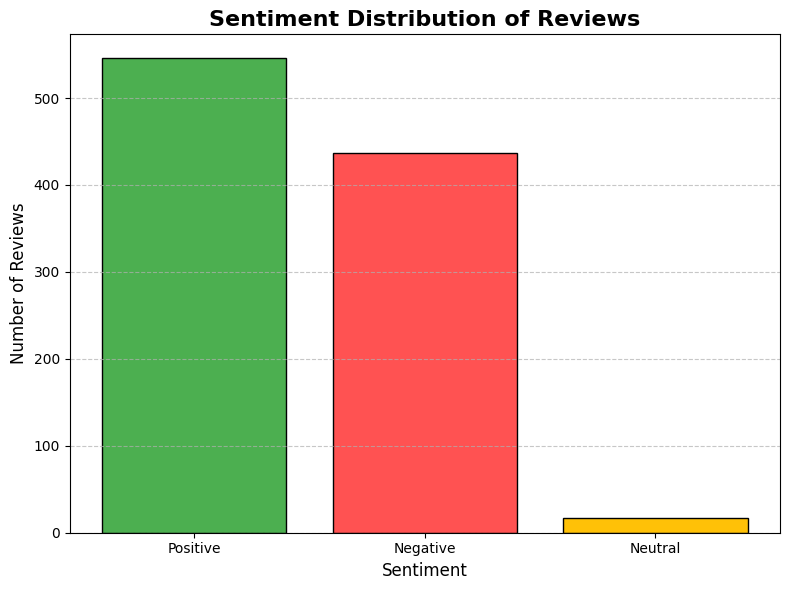

<Figure size 640x480 with 0 Axes>

PowerPoint slide saved to 'data/Skytrax_Analysis_Slide.pptx'.
Final dataset saved for Tableau: 'data/skytrax_reviews_final.csv'


In [7]:
# Importing Libraries
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
!pip install python-pptx
from pptx import Presentation
from pptx.util import Inches

# Ensure the "data" folder exists
if not os.path.exists("data"):
    os.makedirs("data")

# Step 1: Scraping Reviews from Skytrax
# Set up URL and headers
url = "https://www.airlinequality.com/airline-reviews/"
headers = {'User-Agent': 'Mozilla/5.0'}

# Send GET request
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract reviews
reviews = []
for review in soup.find_all('div', class_='text_content'):  # Update class name if needed
    review_text = review.text.strip()
    reviews.append(review_text)

# Check if reviews were scraped
if len(reviews) == 0:
    print("No reviews were scraped. Please check the website structure or scraping logic.")
    exit()

# Save raw reviews to a CSV file
df = pd.DataFrame(reviews, columns=["Review Text"])
df.to_csv("data/skytrax_reviews.csv", index=False)
print("Scraping complete. Data saved to 'data/skytrax_reviews.csv'.")

# Step 2: Data Cleaning and Analysis
# Clean the text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove special characters
    return text

df['Cleaned Text'] = df['Review Text'].apply(clean_text)

# Perform sentiment analysis
df['Polarity'] = df['Cleaned Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Save the cleaned data with sentiments
df.to_csv("data/skytrax_reviews_cleaned.csv", index=False)

# Visualize sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Distribution', figsize=(8, 5))
plt.ylabel('Number of Reviews')
plt.savefig("data/sentiment_chart.png")
plt.show()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Cleaned Text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reviews')
plt.savefig("data/wordcloud.png")
plt.show()

# Step 3: Generate PowerPoint Presentation
# Create a presentation using a template
prs = Presentation()

# Add a slide
slide = prs.slides.add_slide(prs.slide_layouts[5])  # Choose a blank slide layout

# Add title
title = slide.shapes.title
title.text = "Skytrax Airline Review Analysis"

# Add sentiment distribution chart
if os.path.exists("data/sentiment_chart.png"):
    slide.shapes.add_picture("data/sentiment_chart.png", Inches(0.5), Inches(1), width=Inches(6))

# Add word cloud
if os.path.exists("data/wordcloud.png"):
    slide.shapes.add_picture("data/wordcloud.png", Inches(6.5), Inches(1), width=Inches(6))

# Add key insights
textbox = slide.shapes.add_textbox(Inches(0.5), Inches(5.5), Inches(9), Inches(2))
text_frame = textbox.text_frame
text_frame.text = (
    "Key Insights:\n"
    "1. Positive Reviews: {:.1f}%\n".format((sentiment_counts.get('Positive', 0) / len(df)) * 100) +
    "2. Negative Reviews: {:.1f}%\n".format((sentiment_counts.get('Negative', 0) / len(df)) * 100) +
    "3. Common Themes: 'staff', 'cleanliness', 'delays'"
)
import matplotlib.pyplot as plt

# Example sentiment data
sentiment_counts = {'Positive': 1, 'Negative': 2}

# Plot sentiment distribution
import matplotlib.pyplot as plt

# Example frequency data for key topics
topics = ['Service', 'Seat', 'Crew', 'Staff']
frequencies = [120, 85, 95, 75]

# Plot frequency chart
import matplotlib.pyplot as plt


# Plot topic frequency
plt.figure(figsize=(8, 6))
plt.bar(topics, frequencies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], edgecolor='black')
plt.title('Key Topics in Reviews', fontsize=16, fontweight='bold')
plt.xlabel('Topics', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Save and show the chart
plt.savefig("data/topic_frequency_chart.png")
plt.show()

# Save and show the chart
plt.savefig("data/topics_frequency_chart.png")
plt.show()


# Save and show the chart
plt.savefig("data/improved_sentiment_chart.png")
plt.show()

# Save the presentation
prs.save("data/Skytrax_Analysis_Slide.pptx")
print("PowerPoint slide saved to 'data/Skytrax_Analysis_Slide.pptx'.")

# Save final dataset for Tableau
df.to_csv("data/skytrax_reviews_final.csv", index=False)
print("Final dataset saved for Tableau: 'data/skytrax_reviews_final.csv'")

